# **Image segmentation of road images**

## Import libraries

In [16]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

- Install `ultralytics` library, to use YOLO for semantic segmentation

In [2]:
!pip install -q ultralytics

In [3]:
import ultralytics

In [4]:
ultralytics.checks()

Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5597.6/8062.4 GB disk)


- Available classes

In [5]:
labels = ['leftcurve', 'rightcurve', 'uturn']

## Function to visualize random image

In [8]:
def show_images():
    img_dir_path = r"/kaggle/input/road-semantic-segmentation/train/images"
    label_dir_path = r"/kaggle/input/road-semantic-segmentation/train/labels"
    rand_image = random.choice(os.listdir(img_dir_path))
    img = cv2.imread(os.path.join(img_dir_path, rand_image))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    label = os.path.join(label_dir_path, rand_image.replace('.jpg', '.txt'))
    with open(label, "r") as f:
        annot = f.readlines()
    img_title = ""
    for title in annot:   # If there are multiple classes for an image, concat all
        img_title = img_title + " " + labels[int(title[0])]
    plt.imshow(img)
    plt.title(img_title)
    plt.axis('off')

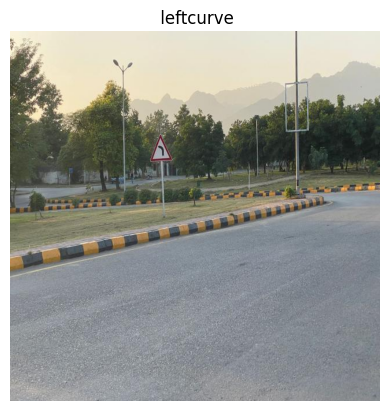

In [30]:
show_images()

- `data.yaml` format

- train: ../train/images
- val: ../valid/images
- test: ../test/images

- nc: 3
- names: ['leftcurve', 'rightcurve', 'uturn']


## Train the `YOLO` model

In [10]:
!yolo segment train data="/kaggle/input/road-semantic-segmentation/data.yaml" model="yolov8s-seg.pt" imgsz=640 epochs=50

100%|███████████████████████████████████████| 22.8M/22.8M [00:00<00:00, 170MB/s]
Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/kaggle/input/road-semantic-segmentation/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_

- Achieved around `9.6` mAP-50 score

- Zip the yolo trained folder to download from Kaggle

In [12]:
!zip -r yolo_train_road_segmentation.zip /kaggle/working/runs

  adding: kaggle/working/runs/ (stored 0%)
  adding: kaggle/working/runs/segment/ (stored 0%)
  adding: kaggle/working/runs/segment/train/ (stored 0%)
  adding: kaggle/working/runs/segment/train/val_batch0_labels.jpg (deflated 9%)
  adding: kaggle/working/runs/segment/train/args.yaml (deflated 53%)
  adding: kaggle/working/runs/segment/train/MaskPR_curve.png (deflated 22%)
  adding: kaggle/working/runs/segment/train/weights/ (stored 0%)
  adding: kaggle/working/runs/segment/train/weights/best.pt (deflated 8%)
  adding: kaggle/working/runs/segment/train/weights/last.pt (deflated 8%)
  adding: kaggle/working/runs/segment/train/BoxPR_curve.png (deflated 22%)
  adding: kaggle/working/runs/segment/train/train_batch1.jpg (deflated 3%)
  adding: kaggle/working/runs/segment/train/results.csv (deflated 85%)
  adding: kaggle/working/runs/segment/train/BoxP_curve.png (deflated 13%)
  adding: kaggle/working/runs/segment/train/confusion_matrix_normalized.png (deflated 28%)
  adding: kaggle/working/

## Results

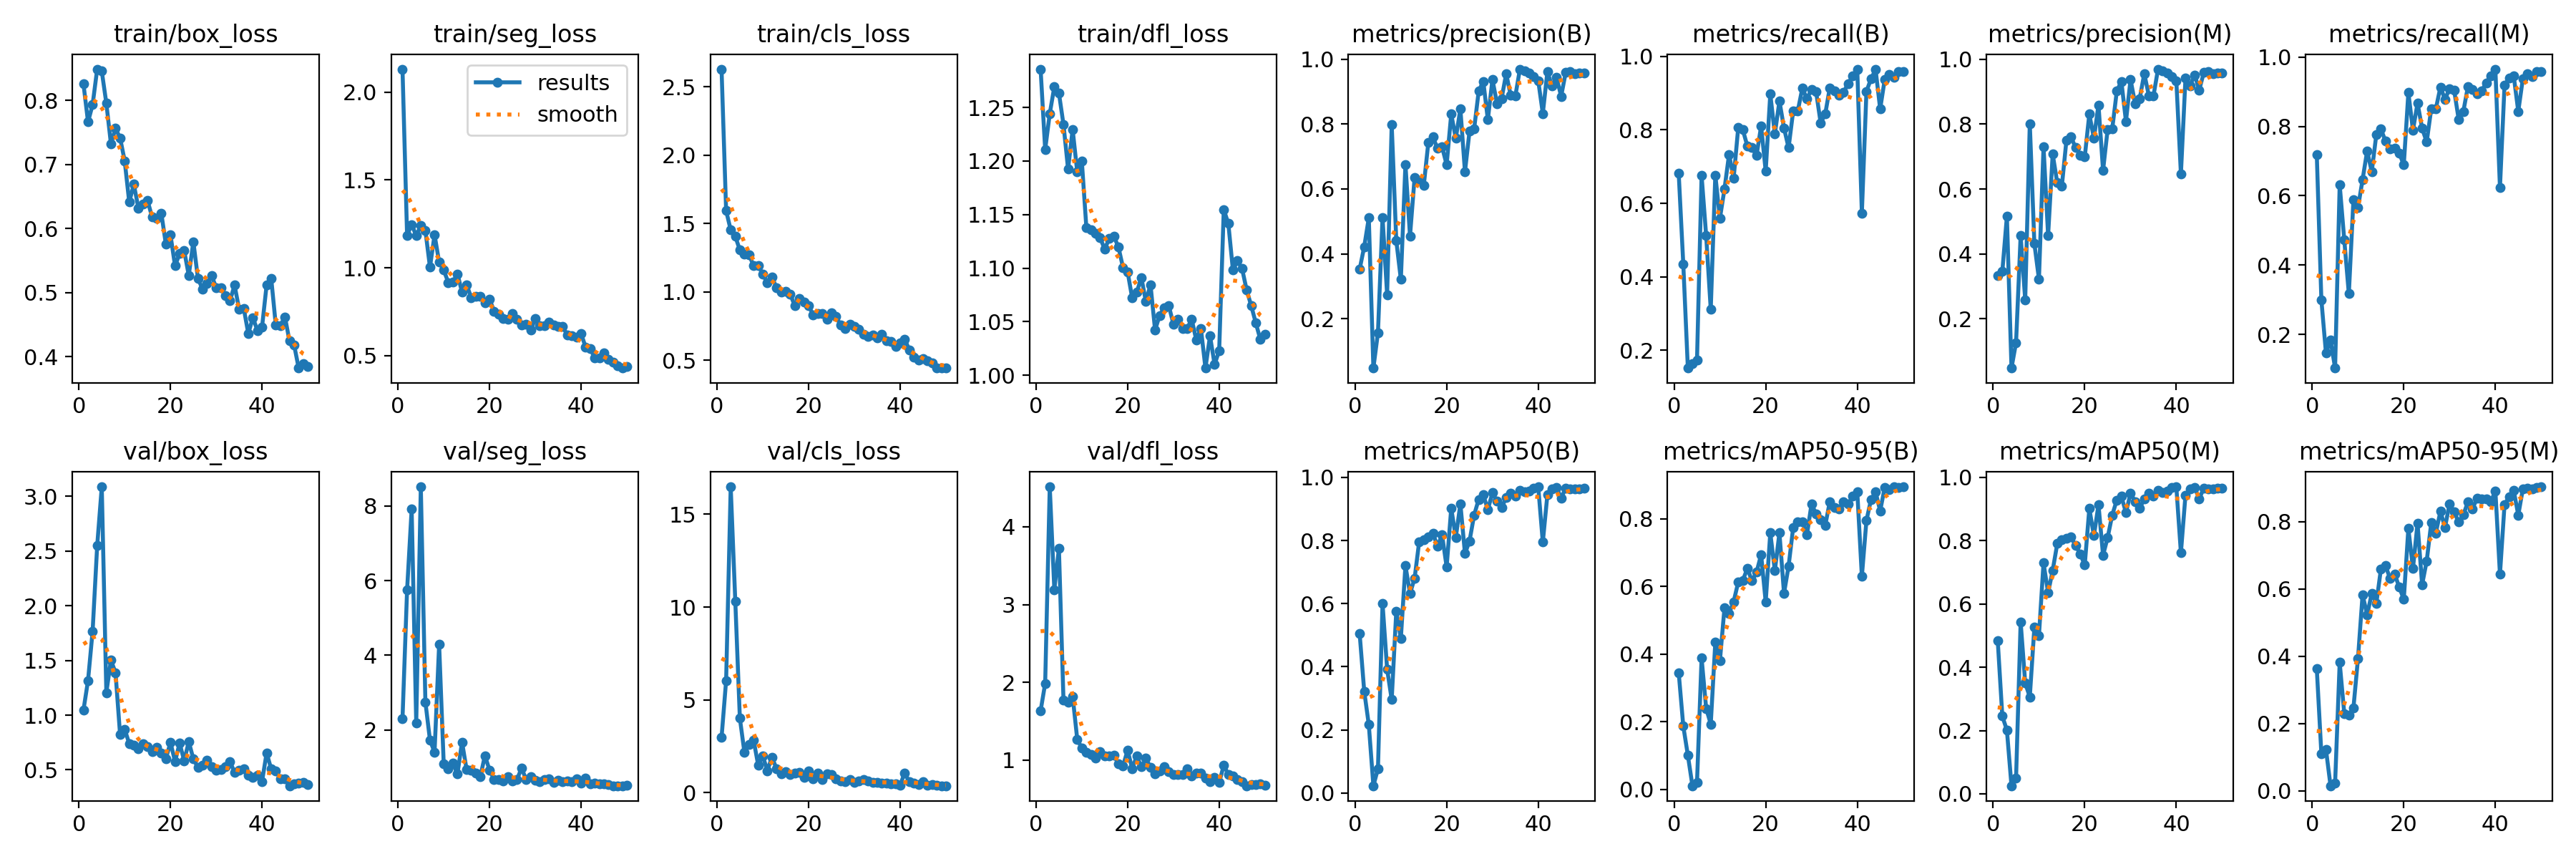

In [17]:
Image.open("/kaggle/working/runs/segment/train/results.png")

## Prediction on Test image

In [26]:
!yolo segment predict model="/kaggle/working/runs/segment/train/weights/last.pt" source="/kaggle/input/road-semantic-segmentation/train/images/IMG-20221027-WA0020_jpg.rf.cfd89dfe0fad39809e25615183ac2131.jpg"

Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780761 parameters, 0 gradients, 42.4 GFLOPs

image 1/1 /kaggle/input/road-semantic-segmentation/train/images/IMG-20221027-WA0020_jpg.rf.cfd89dfe0fad39809e25615183ac2131.jpg: 640x640 1 leftcurve, 21.5ms
Speed: 2.5ms preprocess, 21.5ms inference, 1822.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


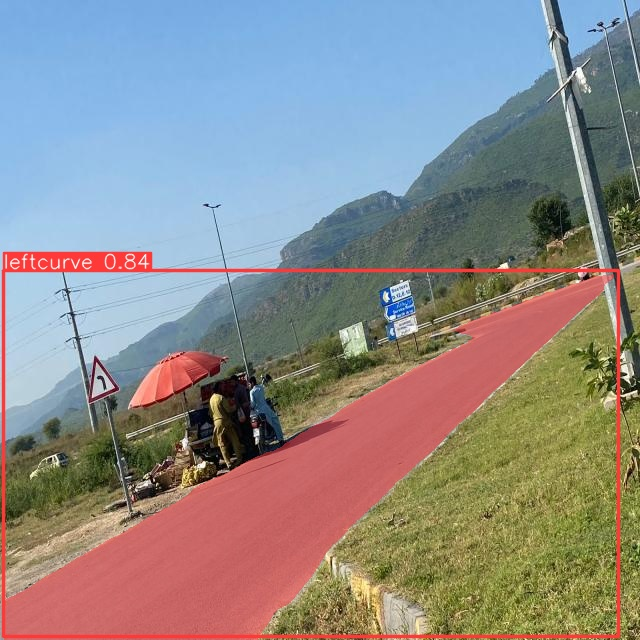

In [27]:
Image.open("/kaggle/working/runs/segment/predict/IMG-20221027-WA0020_jpg.rf.cfd89dfe0fad39809e25615183ac2131.jpg")